In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
data = load_breast_cancer()

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [5]:
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

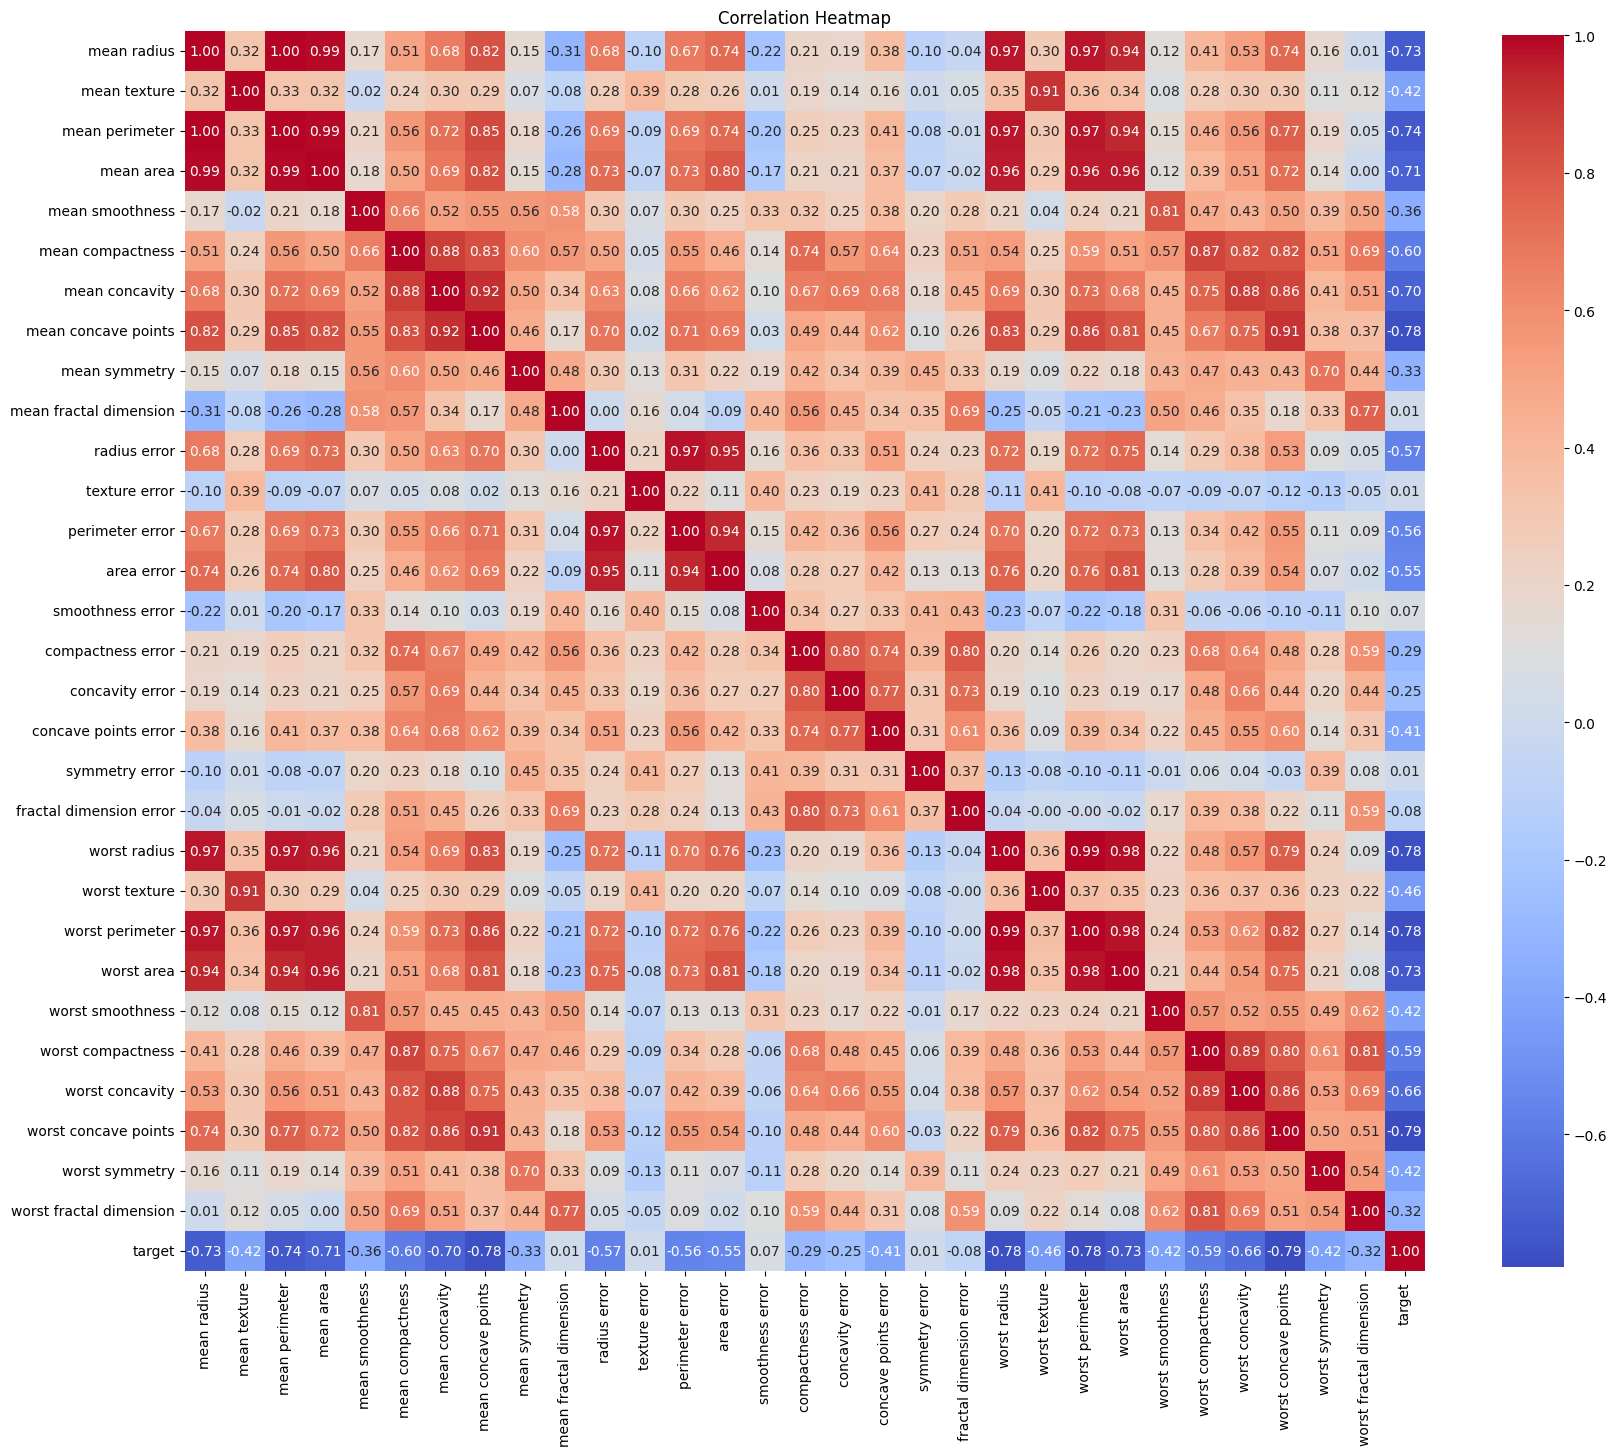

In [10]:
# lets visualiza the heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()


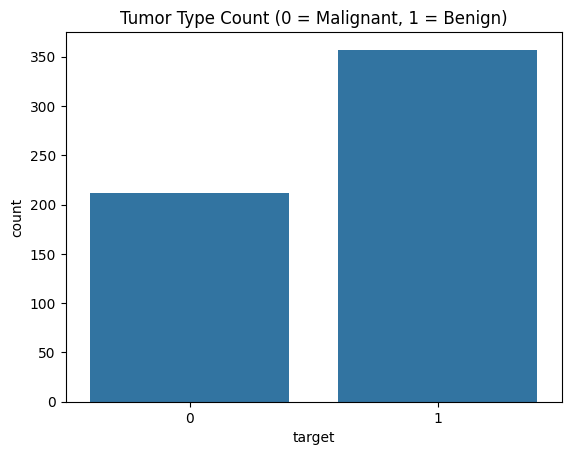

In [11]:
sns.countplot(x='target', data=df)
plt.title("Tumor Type Count (0 = Malignant, 1 = Benign)")
plt.show()


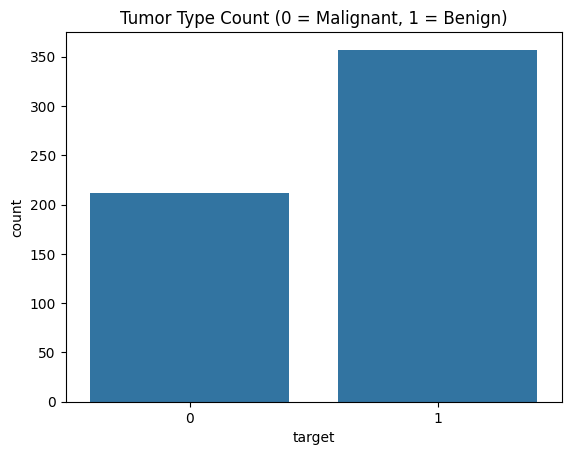

In [12]:
sns.countplot(x='target', data=df)
plt.title("Tumor Type Count (0 = Malignant, 1 = Benign)")
plt.show()


In [13]:
X = df.drop('target', axis=1)  # Features (30 columns)
y = df['target']               # Target (binary label)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
# Lets train the SVM model with different kernels

In [17]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [18]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [19]:
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)


,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [20]:
models = {
    'Linear': svm_linear,
    'RBF': svm_rbf,
    'Polynomial': svm_poly
}


In [21]:
# Evaluate the  each model
for name, model in models.items():
    print(f"\nModel: {name}")
    y_pred = model.predict(X_test)  # Predict on unseen test data
    print(confusion_matrix(y_test, y_pred))  # Shows TP, TN, FP, FN
    print(classification_report(y_test, y_pred))  # Precision, recall, F1-score



Model: Linear
[[41  2]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


Model: RBF
[[41  2]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Model: Polynomial
[[28 15]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        43
           1       0.83      1.00      0.90        71

    accuracy                           0.87       114
   macro avg       0.91  

In [22]:
# Now lets visualize the results of the best model
best_model = svm_rbf  # Assuming RBF kernel performed best
y_pred = best_model.predict(X_test) 


Text(0.5, 36.72222222222221, 'Predicted')

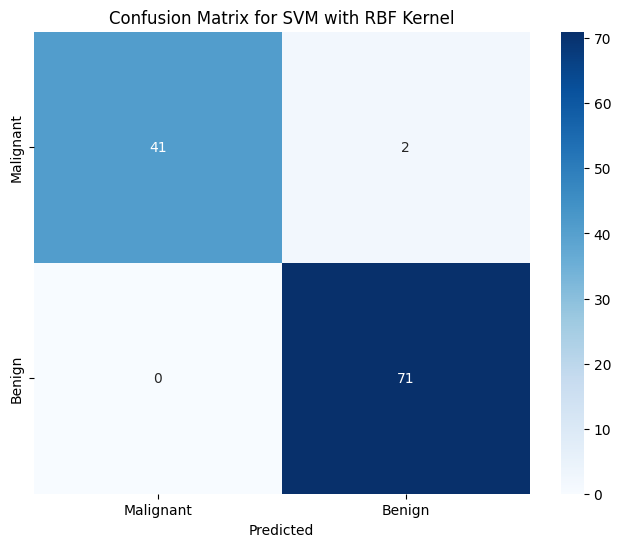

In [23]:
# after prediction, we can visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Malignant', 'Benign'],
              yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix for SVM with RBF Kernel')
plt.xlabel('Predicted')

In [24]:
# After plotting the confusion matrix, now lets preict in new data for the best model

new_data = np.array([[17.99, 10.38, 122.80, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.0782,
                     1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587,
                     0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656,
                     0.7119, 0.2654, 0.4601, 0.08996]])  # Example new data point

new_data_scaled = scaler.transform(new_data)  # Scale the new data
new_prediction = best_model.predict(new_data_scaled)  # Predict using the best model
print(f"\nNew data prediction: {'Benign' if new_prediction[0] == 1 else 'Malignant'}")



New data prediction: Malignant


d:\ML(ExtraClass Project)\ML_DEEP_Project\SVM-Breast-Cancer-Classification\.breastcancerdetection\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
# Let's check the actual prediction of data we have


In [26]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [27]:
# Prepare the new data point (ensure it matches the feature order and count)
sample = np.array([[17.99, 10.38, 122.80, 1001.0, 0.11840, 0.27760, 0.30010, 0.14710, 0.2419, 0.07871,
                   1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
                   25.38, 17.33, 184.60, 2019.0, 0.16220, 0.66560, 0.7119, 0.2654, 0.4601, 0.11890]])

# Scale the sample using the existing scaler
sample_scaled = scaler.transform(sample)

# Predict using the best model
sample_prediction = best_model.predict(sample_scaled)
print(f"Prediction for the sample: {'Benign' if sample_prediction[0] == 1 else 'Malignant'}")

Prediction for the sample: Malignant


d:\ML(ExtraClass Project)\ML_DEEP_Project\SVM-Breast-Cancer-Classification\.breastcancerdetection\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [28]:
# Prepare the new sample (row 568 from the dataset, excluding the target)
new_sample = np.array([[7.76, 24.54, 47.92, 181.0, 0.05263, 0.04362, 0.00000, 0.00000, 0.1587, 0.05884,
                        0.3857, 1.4280, 2.548, 19.15, 0.007189, 0.00466, 0.00000, 0.00000, 0.02676, 0.002783,
                        9.456, 30.37, 59.16, 268.6, 0.08996, 0.06444, 0.0000, 0.0000, 0.2871, 0.07039]])

# Scale the new sample using the existing scaler
new_sample_scaled = scaler.transform(new_sample)

# Predict using the best model
new_sample_prediction = best_model.predict(new_sample_scaled)
print(f"Prediction for the new sample: {'Benign' if new_sample_prediction[0] == 1 else 'Malignant'}")

Prediction for the new sample: Benign


d:\ML(ExtraClass Project)\ML_DEEP_Project\SVM-Breast-Cancer-Classification\.breastcancerdetection\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
# Save the model andn scaler for future use
import joblib
joblib.dump(best_model, 'svm_model.joblib')
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']